In [32]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle

def get_draftprune_matrix(startlinear,select_token):
    originarea = (startlinear+1)* 32
    origin_attn = []
    for i in range(originarea,originarea+32):
        origin_attn .append( torch.load(f"/home/chenruiyang/Code/LLM/EAGLE3/eagle/checkattn/pruned{i}.pt").to('cpu') )
    origin_attn = torch.cat(origin_attn,dim=0)
    # print(origin_attn.shape)
    origin_attn=origin_attn.sum(dim=1)
    print(origin_attn.shape)

    draft_attn=torch.load(f"/home/chenruiyang/Code/LLM/EAGLE3/eagle/checkattn/draft{startlinear}.pt").to('cpu')
    # print(draft_attn.shape)
    draft_attn=draft_attn.sum(dim=1)
    print(draft_attn.shape)
    # print(draft_attn[0,select_token,0])

    matrix = torch.cat([draft_attn,origin_attn],dim=0)[:,select_token,:].numpy()
    # print(matrix[0,0])

    # print(matrix.shape)
    return matrix


def get_draftbase_matrix(startlinear,select_token):
    originarea = (startlinear+1)* 32
    origin_attn = []
    for i in range(originarea,originarea+32):
        origin_attn .append( torch.load(f"/home/chenruiyang/Code/LLM/EAGLE3/eagle/checkattn/real{i}.pt").to('cpu') )
    origin_attn = torch.cat(origin_attn,dim=0)
    # print(origin_attn.shape)
    origin_attn=origin_attn.sum(dim=1)
    print(origin_attn.shape)

    draft_attn=torch.load(f"/home/chenruiyang/Code/LLM/EAGLE3/eagle/checkattn/draft{startlinear}.pt").to('cpu')
    # print(draft_attn.shape)
    draft_attn=draft_attn.sum(dim=1)
    print(draft_attn.shape)
    # print(draft_attn[0,select_token,0])

    matrix = torch.cat([draft_attn,origin_attn],dim=0)[:,select_token,:].numpy()
    # print(matrix[0,0])

    # print(matrix.shape)
    return matrix

def get_draftafterprune_matrix(startlinear,select_token):
    originarea = (startlinear+1)* 32
    origin_attn = []
    for i in range(originarea,originarea+32):
        origin_attn .append( torch.load(f"/home/chenruiyang/Code/LLM/EAGLE3/eagle/checkattn/attnafterprune{i}.pt").to('cpu') )
    origin_attn = torch.cat(origin_attn,dim=0)
    # print(origin_attn.shape)
    origin_attn=origin_attn.sum(dim=1)
    print(origin_attn.shape)

    draft_attn=torch.load(f"/home/chenruiyang/Code/LLM/EAGLE3/eagle/checkattn/draft{startlinear}.pt").to('cpu')
    # print(draft_attn.shape)
    draft_attn=draft_attn.sum(dim=1)
    print(draft_attn.shape)
    # print(draft_attn[0,select_token,0])

    matrix = torch.cat([draft_attn,origin_attn],dim=0)[:,select_token,:].numpy()
    # print(matrix[0,0])

    # print(matrix.shape)
    return matrix

def draw_pic(matrix,tag='heatmap'):
    
    # 设置区间范围和对应颜色
    intervals = [
        (0.0, 0.05),   # 区间1
        (0.05, 0.1),   # 区间2
        (0.1, 0.2),   # 区间3
        (0.2, 0.5),   # 区间4
        (0.5, 1.0)    # 区间5
    ]

    # 每个区间对应的颜色（可自定义）
    colors = [
        '#FF9999',  # 浅红色
        '#FFCC99',  # 浅橙色
        '#FFFF99',  # 浅黄色
        '#CCFF99',  # 浅绿色
        '#99CCFF'   # 浅蓝色
    ]


    # 创建图形和坐标轴
    fig, ax = plt.subplots(figsize=(20, 16))
    ax.set_aspect('equal')  # 确保方格为正方形
    ax.invert_yaxis()       # 反转Y轴使矩阵左上角为(0,0)

    # 获取矩阵尺寸
    rows, cols = matrix.shape

    # 绘制方格图
    for i in range(rows):
        for j in range(cols):
            value = matrix[i, j]
            
            # 确定值所在区间
            color_idx = -1
            for idx, (low, high) in enumerate(intervals):
                if low <= value < high:
                    color_idx = idx
                    break
            
            # 如果值不在任何区间（如1.0），使用最后一个颜色
            if color_idx == -1:
                color_idx = len(intervals) - 1
            
            # 绘制方格
            rect = Rectangle((j, i), 1, 1, 
                            facecolor=colors[color_idx],
                            edgecolor='black',
                            linewidth=1)
            ax.add_patch(rect)
            
            # 在方格中心添加数值
            # ax.text(j + 0.5, i + 0.5, f"{value:.2f}", 
            #         ha='center', va='center', 
            #         fontsize=12, fontweight='bold')

    # 设置坐标轴范围
    ax.set_xlim(0, cols)
    ax.set_ylim(0, rows)

    # 设置刻度位置和标签
    # ax.set_xticks(np.arange(0.5, cols, 1))
    # ax.set_yticks(np.arange(0.5, rows, 1))
    # ax.set_xticklabels(range(1, cols + 1))
    # ax.set_yticklabels(range(1, rows + 1))

    # 添加网格线
    ax.grid(True, which='both', color='gray', linestyle='-', linewidth=1)

    # 添加标题和轴标签
    plt.title(tag, fontsize=14, pad=20)
    plt.xlabel("col", fontsize=12)
    plt.ylabel("row", fontsize=12)

    # 创建图例
    legend_patches = []
    for i, (low, high) in enumerate(intervals):
        legend_patches.append(
            Rectangle((0, 0), 1, 1, facecolor=colors[i], 
                    edgecolor='black', 
                    label=f"[{low:.2f}, {high:.2f})")
        )
    plt.legend(handles=legend_patches, 
            title="Interval", 
            loc='upper right',
            bbox_to_anchor=(1.1, 1))

    # 调整布局
    plt.tight_layout()

    # 显示图表
    plt.show()

torch.Size([32, 60, 206])
torch.Size([1, 60, 206])


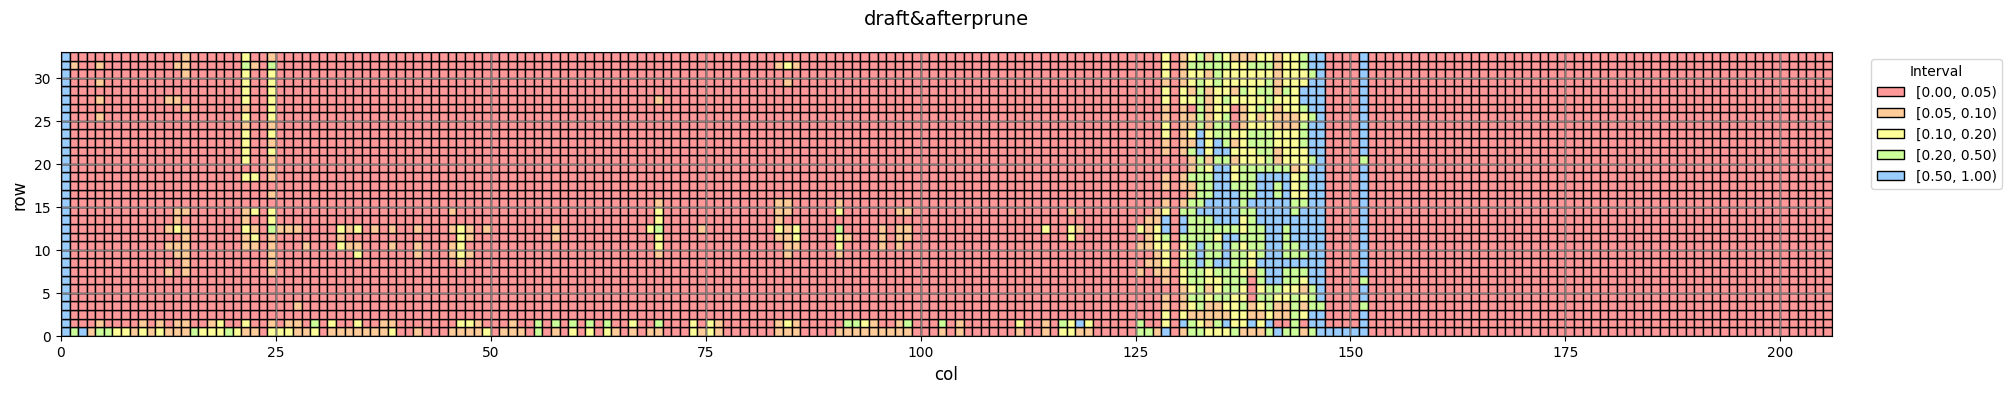

torch.Size([32, 60, 206])
torch.Size([1, 60, 206])


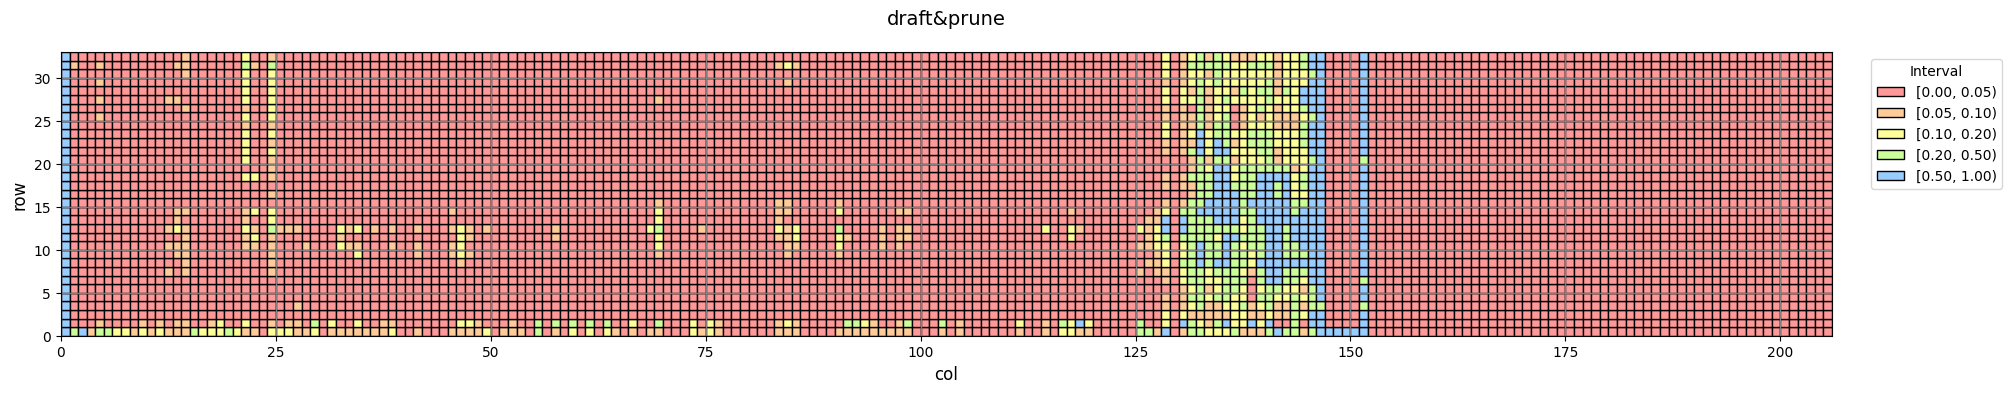

torch.Size([32, 60, 206])
torch.Size([1, 60, 206])


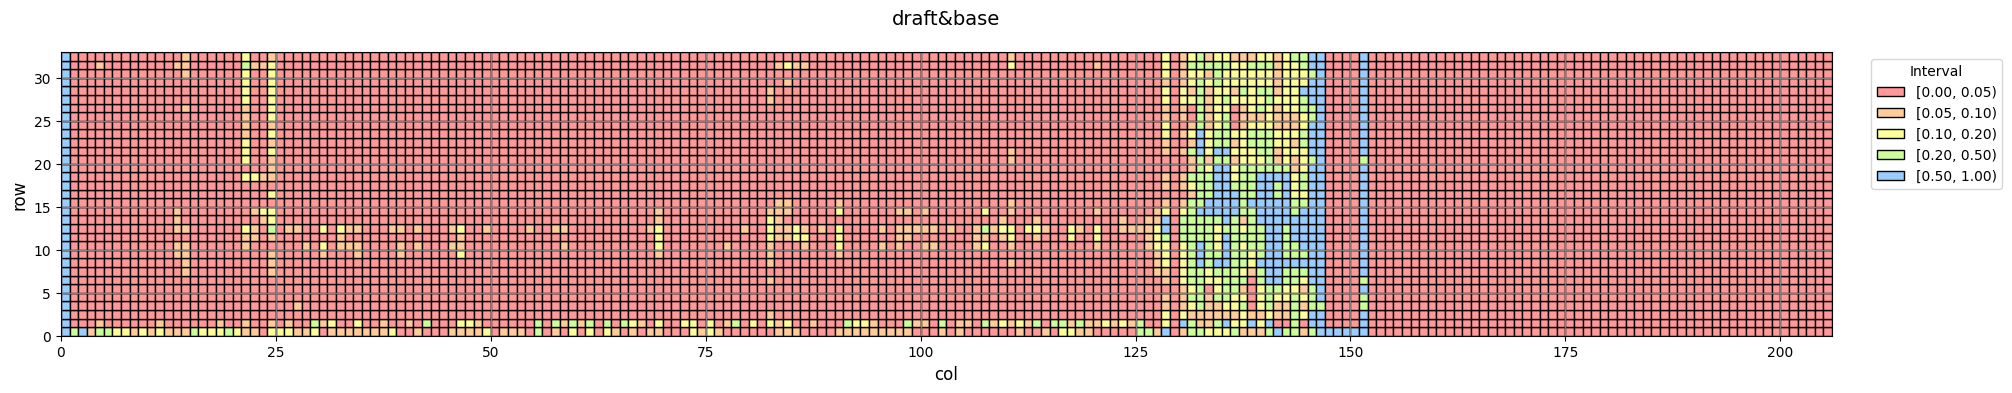

In [33]:
draw_pic(get_draftafterprune_matrix(0,5),'draft&afterprune')
draw_pic(get_draftprune_matrix(0,5),'draft&prune')
draw_pic(get_draftbase_matrix(0,5),'draft&base')

torch.Size([32, 60, 206])
torch.Size([1, 60, 206])


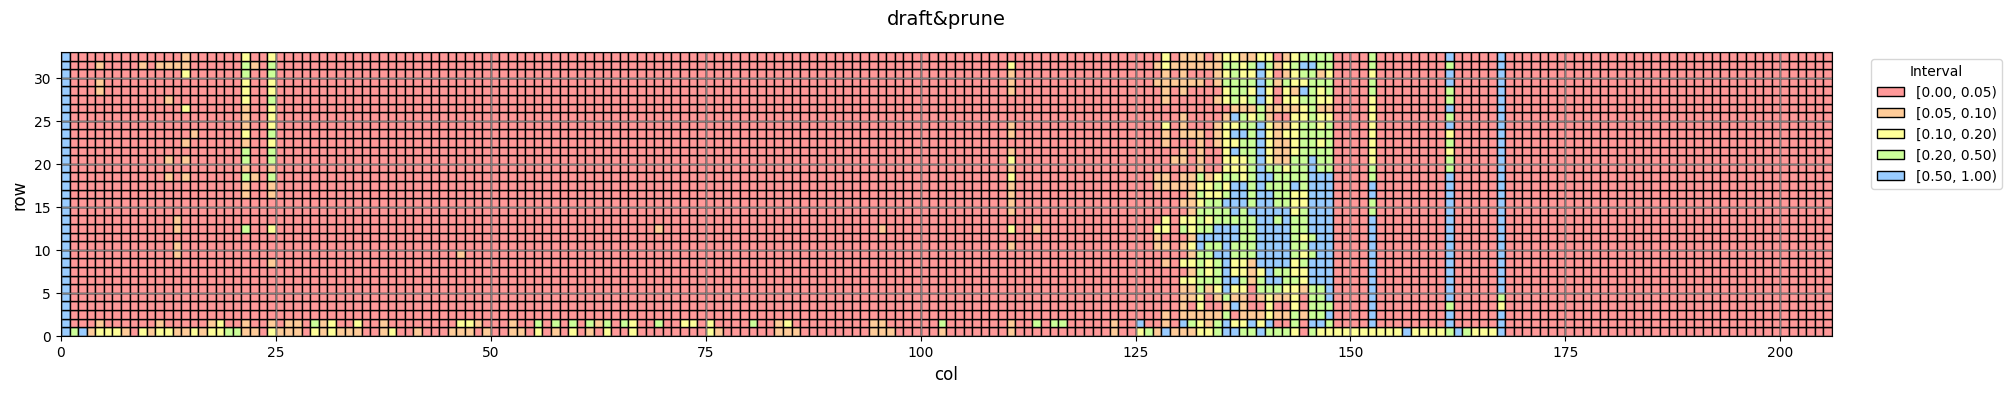

torch.Size([32, 60, 206])
torch.Size([1, 60, 206])


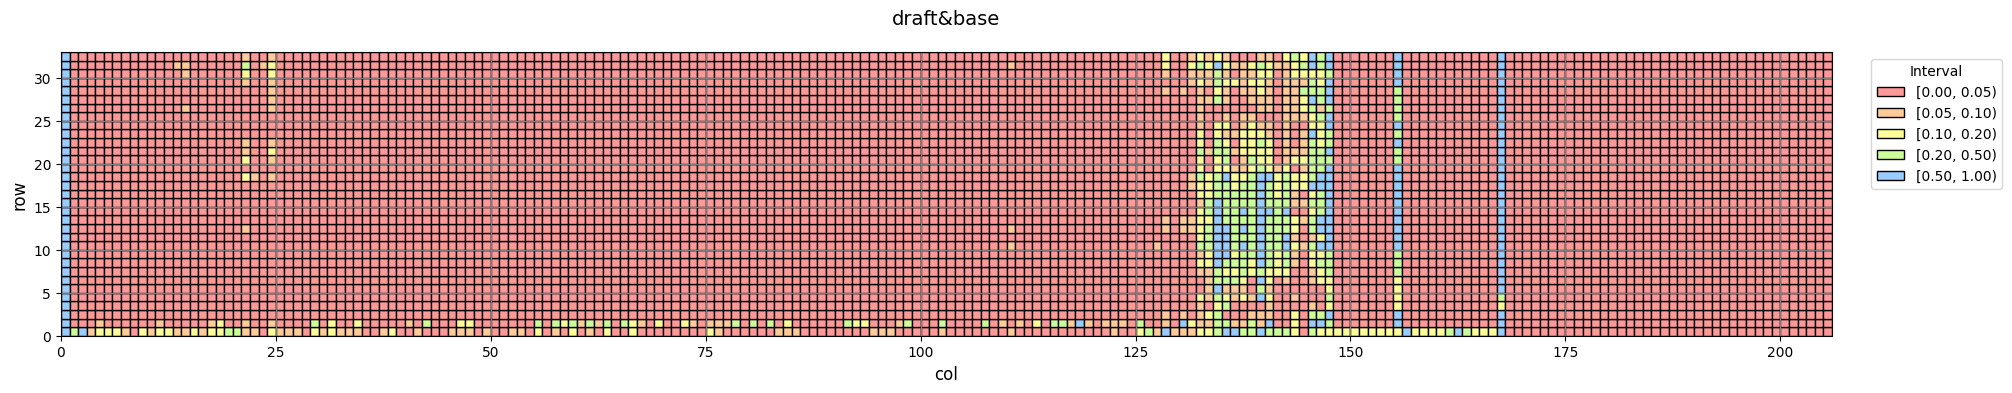

In [38]:
# draw_pic(get_draftafterprune_matrix(0,15),'draft&afterprune')
draw_pic(get_draftprune_matrix(0,21),'draft&prune')
draw_pic(get_draftbase_matrix(0,21),'draft&base')

torch.Size([1, 60, 206])


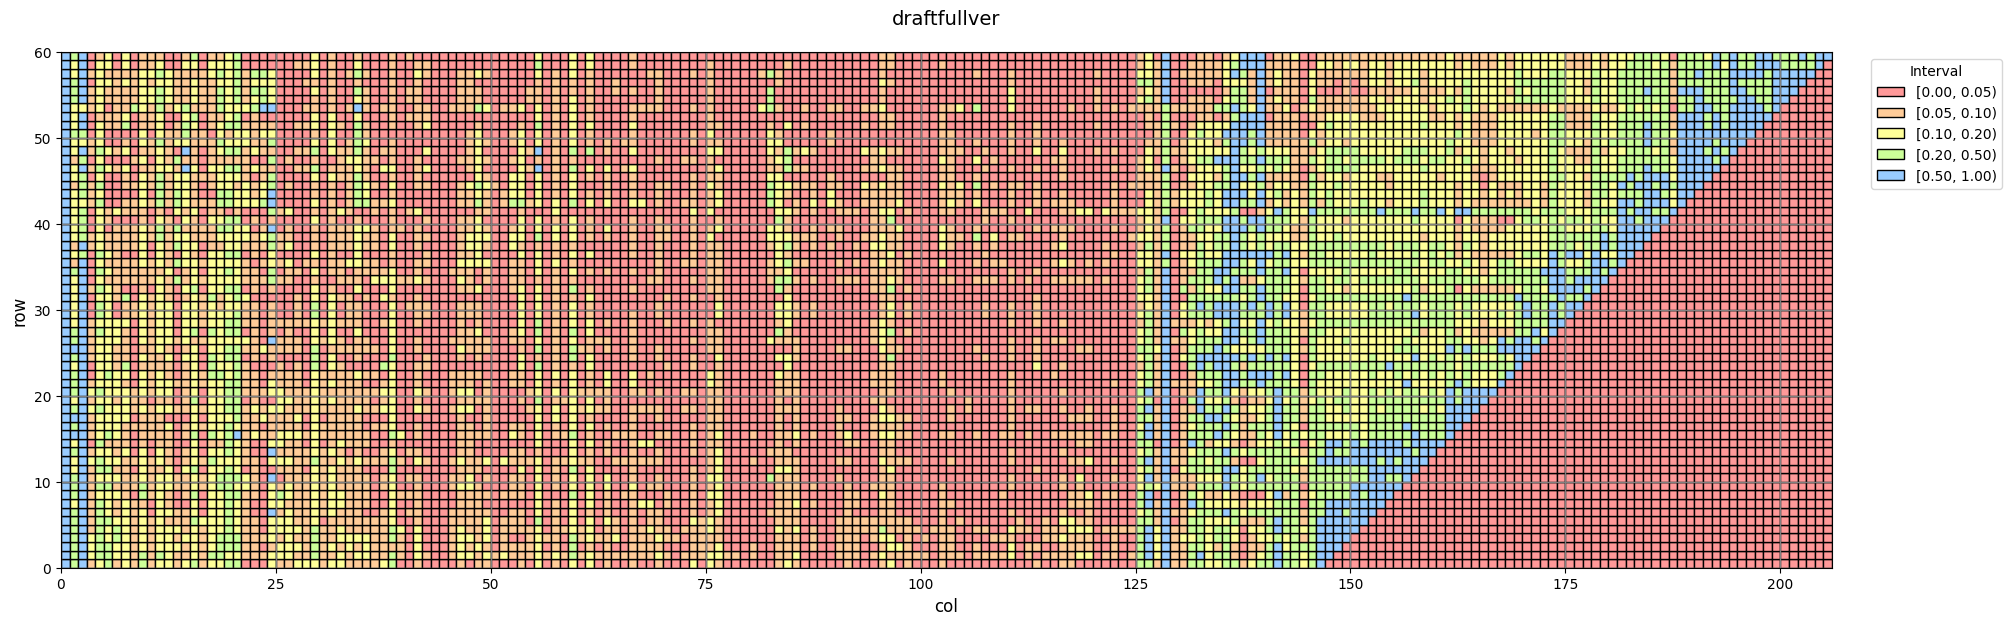

In [24]:
draft_attn=torch.load(f"/home/chenruiyang/Code/LLM/EAGLE3/eagle/checkattn/draft{0}.pt").to('cpu')
# print(draft_attn.shape)
draft_attn=draft_attn.sum(dim=1)
print(draft_attn.shape)
# print(draft_attn[0,select_token,0])

matrix = draft_attn[0].numpy()
    
draw_pic(matrix,'draftfullver')

torch.Size([32, 60, 206])


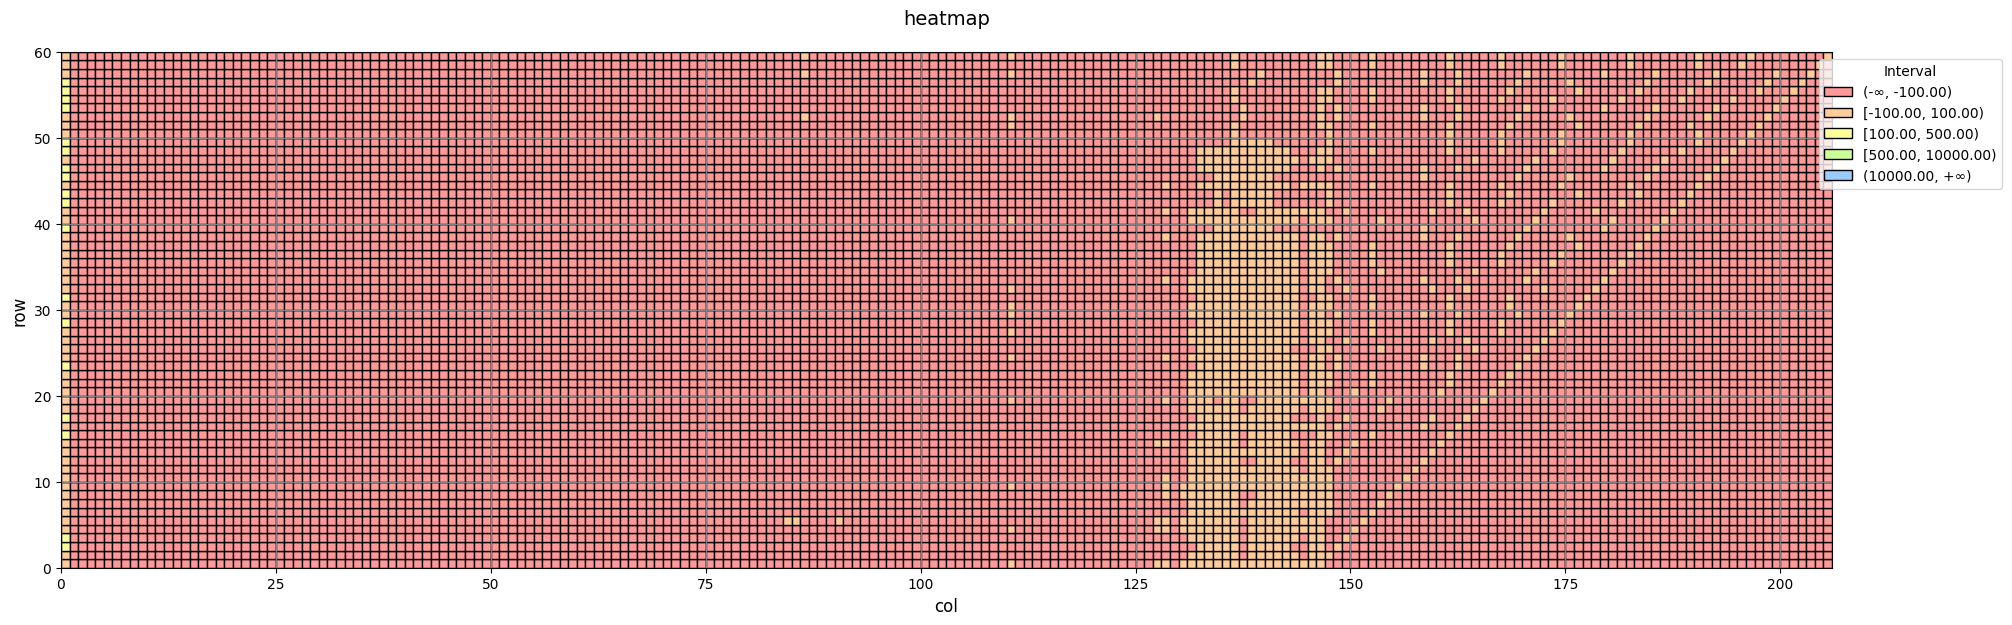

In [4]:


def draw_pic2(matrix,tag='heatmap'):
    
    # 设置区间范围和对应颜色
    intervals = [
        (-1e100, -100),   # 区间1
        (-100, 100),   # 区间2
        (100, 500),   # 区间3
        (500, 10000),   # 区间4
        (10000, 1e100)    # 区间5
    ]

    # 每个区间对应的颜色（可自定义）
    colors = [
        '#FF9999',  # 浅红色
        '#FFCC99',  # 浅橙色
        '#FFFF99',  # 浅黄色
        '#CCFF99',  # 浅绿色
        '#99CCFF'   # 浅蓝色
    ]


    # 创建图形和坐标轴
    fig, ax = plt.subplots(figsize=(20, 16))
    ax.set_aspect('equal')  # 确保方格为正方形
    ax.invert_yaxis()       # 反转Y轴使矩阵左上角为(0,0)

    # 获取矩阵尺寸
    rows, cols = matrix.shape

    # 绘制方格图
    for i in range(rows):
        for j in range(cols):
            value = matrix[i, j]
            
            # 确定值所在区间
            color_idx = -1
            for idx, (low, high) in enumerate(intervals):
                if low <= value < high:
                    color_idx = idx
                    break
            
            # 如果值不在任何区间（如1.0），使用最后一个颜色
            if color_idx == -1:
                color_idx = len(intervals) - 1
            
            # 绘制方格
            rect = Rectangle((j, i), 1, 1, 
                            facecolor=colors[color_idx],
                            edgecolor='black',
                            linewidth=1)
            ax.add_patch(rect)
            
            # 在方格中心添加数值
            # ax.text(j + 0.5, i + 0.5, f"{value:.2f}", 
            #         ha='center', va='center', 
            #         fontsize=12, fontweight='bold')

    # 设置坐标轴范围
    ax.set_xlim(0, cols)
    ax.set_ylim(0, rows)

    # 设置刻度位置和标签
    # ax.set_xticks(np.arange(0.5, cols, 1))
    # ax.set_yticks(np.arange(0.5, rows, 1))
    # ax.set_xticklabels(range(1, cols + 1))
    # ax.set_yticklabels(range(1, rows + 1))

    # 添加网格线
    ax.grid(True, which='both', color='gray', linestyle='-', linewidth=1)

    # 添加标题和轴标签
    plt.title(tag, fontsize=14, pad=20)
    plt.xlabel("col", fontsize=12)
    plt.ylabel("row", fontsize=12)

    # 创建图例
    legend_patches = []
    for i, (low, high) in enumerate(intervals):
        label = f"[{low:.2f}, {high:.2f})"
        if low < -1e50: label = f"(-∞, {high:.2f})"
        if high > 1e50: label = f"({low:.2f}, +∞)"
        legend_patches.append(
            Rectangle((0, 0), 1, 1, facecolor=colors[i], 
                    edgecolor='black', 
                    label=label)
        )
    plt.legend(handles=legend_patches, 
            title="Interval", 
            loc='upper right',
            bbox_to_anchor=(1.1, 1))

    # 调整布局
    plt.tight_layout()

    # 显示图表
    plt.show()


tensor(0.)
torch.Size([1, 1, 60, 206])
torch.Size([60, 206])
torch.Size([60, 206])
torch.Size([60, 206])


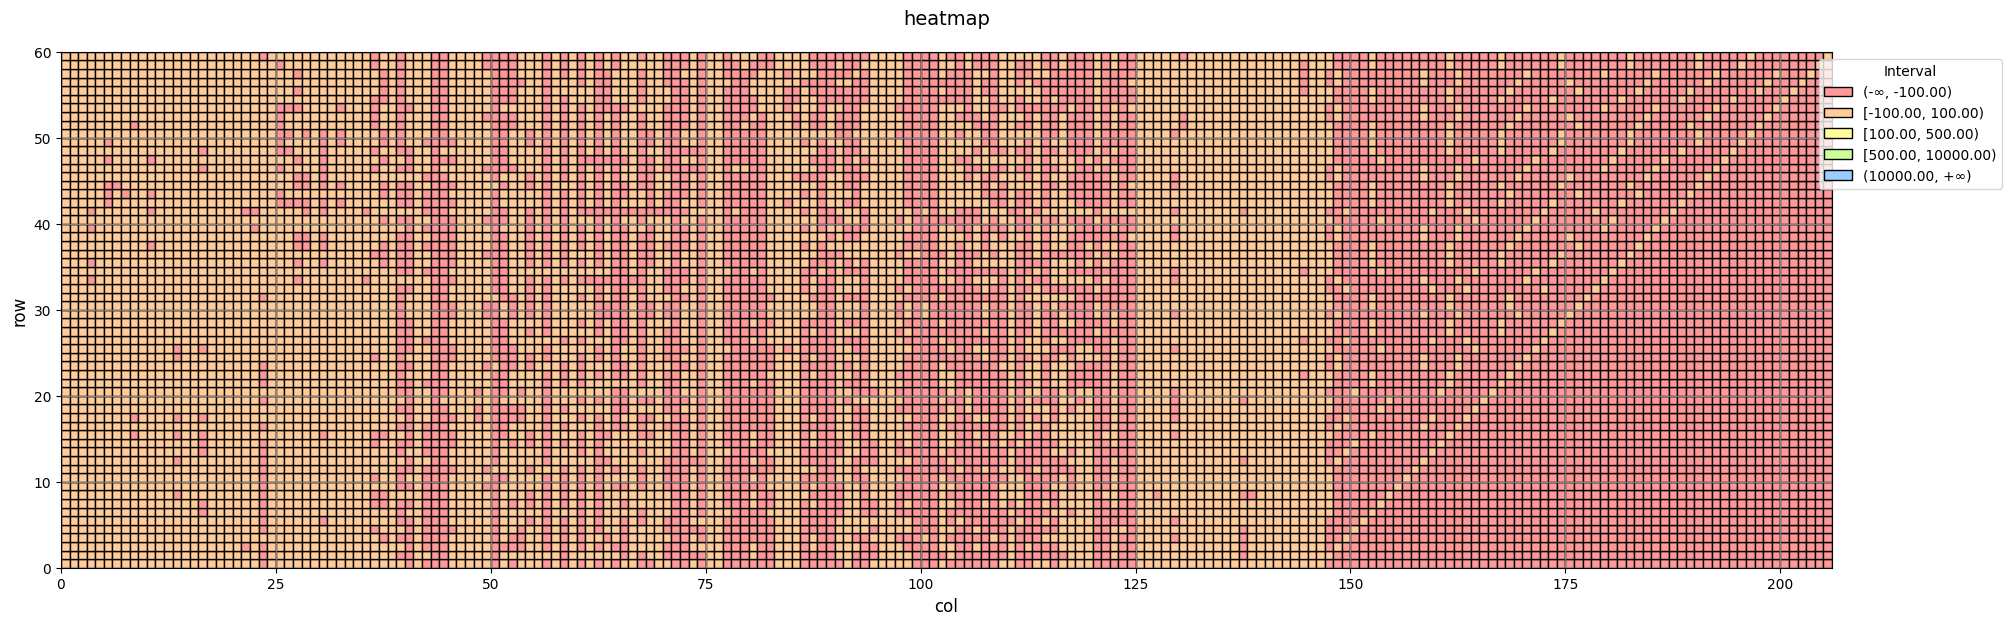

In [36]:
number=32

masks =torch.load(f"/home/chenruiyang/Code/LLM/EAGLE3/eagle/checkattn/attnmask{number}.pt").to('cpu')
print(masks[0,0,10,10])
print(masks.shape)
masks=masks[0,0]
print(masks.shape)
# draw_pic(masks.numpy())

masks2 =torch.load(f"/home/chenruiyang/Code/LLM/EAGLE3/eagle/checkattn/attnmasko{number}.pt").to('cpu')
print(masks.shape)
masks2=masks2[0,0]
print(masks2.shape)
# draw_pic(masks.numpy())
masks[:,-60:]=masks2[:,-60:]
draw_pic2(masks)